# Testing implementación RIGOL MSO2102A

A partir de 8 test se verofican:

- Comunicación SCPI funcional
- RUN/STOP, escalas, trigger
- Modos de adquisición
- Lectura y graficado de forma de onda
- Secuencia automática integrada

## TEST 1 – Conexión y comunicación básica

Se muestra abre la conexión y muestra la información técnica del equipo: fabricante, modelo, etc.

In [4]:
from oscrigol import Oscrigol

# Crear objeto y conectar
scope = Oscrigol("192.168.2.2")
scope.initComm()

# Verificar identificación
print("Identificación del equipo:", scope.getID())

# Cerrar conexión
scope.closeComm()


Identificación del equipo: RIGOL TECHNOLOGIES,MSO2102A,DS2F214100395,00.03.06



## TEST 2 – Comandos de ejecución: RUN / STOP

La pantalla del RIGOL debería congelarse y luego reanudar movimiento.

In [5]:
import time

# Abrir conexión
scope.initComm()

# Detener adquisición
scope.stop()
print("Estado: Pantalla congelada y botón RUN/STOP en ROJO")

# Delay 5 segundos
print("Delay 5 segundos....")
time.sleep(5)

# Iniciar adquisición
scope.run()
print("Estado: Señal vuelve a actualizarse y botón RUN/STOP en VERDE")

# Cerrar conexión
scope.closeComm()

Estado: Pantalla congelada y botón RUN/STOP en ROJO
Delay 5 segundos....
Estado: Señal vuelve a actualizarse y botón RUN/STOP en VERDE


## TEST 3 – Escala vertical y horizontal

La escala vertical del CH1 cambia en pantalla.

El eje horizontal se ajusta a 1 ms/div.

In [6]:
# Abrir conexión
scope.initComm()

# Ajustar escala vertical del canal 1
scope.setVertScale(channel=1, vScale=0.5)
print("Escala vertical (CH1) actual:", scope.getVertScale(1), "V/div")

# Ajustar escala horizontal (base de tiempo)
time_scale = 1e-3 # 1 ms
scope.setHScale(horizontalScale=time_scale)
print(f"Base de tiempo ajustada a {time_scale*1e3} ms/div")

# Cerrar conexión
scope.closeComm()

Escala vertical (CH1) actual: 0.5 V/div
Base de tiempo ajustada a 1.0 ms/div


## TEST 4 – Configuración de trigger

La línea de trigger se mueve a 0 V.

In [7]:
# Abrir conexión
scope.initComm()

# Configurar trigger en canal 1, flanco positivo, acoplamiento DC
scope.setEdgeTrigger(source="CHAN1", slope="POS", coupling="DC", level=0.0)
print("Trigger configurado en flanco positivo, nivel 0 V")

# Cerrar conexión
scope.closeComm()

Trigger configurado en flanco positivo, nivel 0 V


## TEST 5 – Modos de adquisición

El osciloscopio cambia a “Average 4” en la barra superior.
La forma de onda se suaviza.

In [8]:
scope.initComm()

# Modo Sample (normal)
scope.setSampAcquisition()
print("Modo de adquisición: SAMPLE")

time.sleep(2)

# Modo Average (4 promedios)
scope.setAvgAcquisition(4)
print("Modo de adquisición: AVERAGE (4)")

scope.closeComm()

Modo de adquisición: SAMPLE
Modo de adquisición: AVERAGE (4)


## TEST 6 – Adquisición y lectura de datos

Obtener una curva correspondiente a la señal del CH1 (por ejemplo, una onda cuadrada de la salida de prueba).

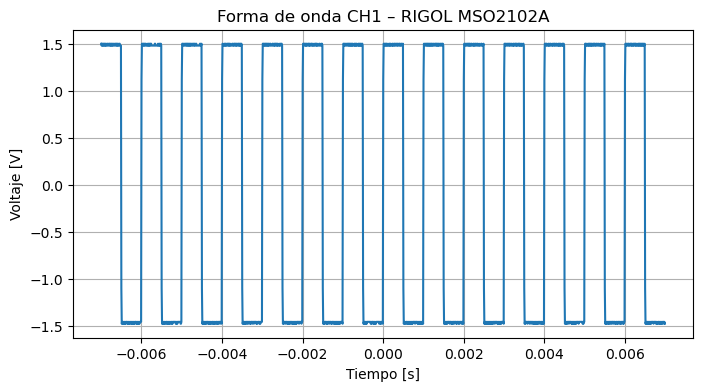

In [9]:
import matplotlib.pyplot as plt
import numpy as np

scope.initComm()

# Detener adquisición y leer datos de canal 1
scope.stop()
t = scope.getHorValues(channel=1)
v = scope.getVertValues(channel=1)

scope.run()
scope.closeComm()

# Graficar
plt.figure(figsize=(8,4))
plt.plot(t, v)
plt.title("Forma de onda CH1 – RIGOL MSO2102A")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.show()


## TEST 7 – Mostrar/Ocultar canal

El canal 2 desaparece del display y luego vuelve a mostrarse.

In [10]:
scope.initComm()

# Ocultar canal 2
scope.hideChannel(2)
print("Canal 2 oculto")

time.sleep(2)

# Mostrar canal 2
scope.showChannel(2)
print("Canal 2 visible nuevamente")

scope.closeComm()

Canal 2 oculto
Canal 2 visible nuevamente


## TEST 8 – Adquisición completa usando `__call__()`

Mismo resultado que en el Test 6, pero ahora automatizado (usa la lógica interna de la clase).

Datos adquiridos: (2, 1400)


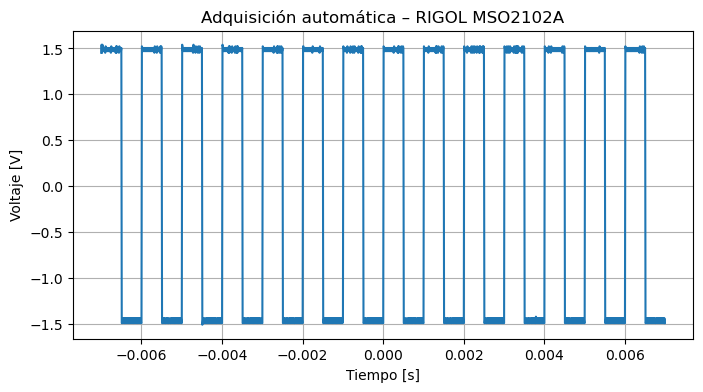

In [11]:
# Este método ejecuta la secuencia completa: conectar, configurar, adquirir y devolver datos
scope = Oscrigol("192.168.2.2")
scope.config(channels=(1,), vAutoScale=True)

data = scope()   # Abre, adquiere, deja RUN, no cierra conexión
print("Datos adquiridos:", data.shape)

# Graficar
t, v = data
plt.figure(figsize=(8,4))
plt.plot(t, v)
plt.title("Adquisición automática – RIGOL MSO2102A")
plt.xlabel("Tiempo [s]")
plt.ylabel("Voltaje [V]")
plt.grid(True)
plt.show()

scope.closeComm()


---

## TEST X – Adquisición 

El modo debe devolver MAXimum

getWaveformPointsCount() aprox 7000000

El gráfico resultante debe mostrar la señal con muchísima mayor resolución que los 1400 puntos del display.

In [22]:
scope.initComm()

scope.stop()

scope.setWaveformPointsMode('MAX')

#print("Modo de puntos:", scope.getWaveformPointsMode())
#print("Cantidad de puntos disponibles:", scope.getWaveformPointsCount())

t = scope.getHorValues(channel=1, mode='MAX')
v = scope.getVertValues(channel=1, mode='MAX')

scope.run()
scope.closeComm()

print("Datos descargados:", len(v), "puntos")

Datos descargados: 1400 puntos
